# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/house_price_project/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/house_price_project'

# Section 1

Section 1 content

In [6]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for consistency
sns.set_style('whitegrid')

# Import datasets
house_data = pd.read_csv('data/house_prices_records.csv')
inherited_houses = pd.read_csv('data/inherited_houses.csv')


In [7]:
# Display the first five rows of house_data
house_data.head()


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

Initial Data Overview
Shape of the Data

In [8]:
print(f"House Data Shape: {house_data.shape}")
print(f"Inherited Houses Shape: {inherited_houses.shape}")


House Data Shape: (1460, 24)
Inherited Houses Shape: (4, 23)


Data Types and Missing Values


In [9]:
# Check data types and missing values
house_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

# Section 2

Exploratory Data Analysis (EDA)
EDA helps us understand patterns, detect anomalies, and test hypotheses using summary statistics and graphical representations.

Summary Statistics

In [10]:
# Statistical summary
house_data.describe()


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1374.000000,1361.000000,1460.000000,1460.000000,136.000000,1460.000000,1379.000000,1460.000000,1460.000000,1201.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,155.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,348.524017,2.869214,443.639726,567.240411,25.330882,472.980137,1978.506164,1515.463699,10516.828082,70.049958,103.685262,46.660274,5.575342,6.099315,1057.429452,103.741935,1971.267808,1984.865753,180921.195890
std,386.587738,438.865586,0.820115,456.098091,441.866955,66.684115,213.804841,24.689725,525.480383,9981.264932,24.284752,181.066207,66.256028,1.112799,1.382997,438.705324,135.543152,30.202904,20.645407,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,334.000000,1300.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1872.000000,1950.000000,34900.000000
25%,882.000000,0.000000,2.000000,0.000000,223.000000,0.000000,334.500000,1961.000000,1129.500000,7553.500000,59.000000,0.000000,0.000000,5.000000,5.000000,795.750000,0.000000,1954.000000,1967.000000,129975.000000
50%,1087.000000,0.000000,3.000000,383.500000,477.500000,0.000000,480.000000,1980.000000,1464.000000,9478.500000,69.000000,0.000000,25.000000,5.000000,6.000000,991.500000,0.000000,1973.000000,1994.000000,163000.000000
75%,1391.250000,728.000000,3.000000,712.250000,808.000000,0.000000,576.000000,2002.000000,1776.750000,11601.500000,80.000000,166.000000,68.000000,6.000000,7.000000,1298.250000,182.500000,2000.000000,2004.000000,214000.000000
max,4692.000000,2065.000000,8.000000,5644.000000,2336.000000,286.000000,1418.000000,2010.000000,5642.000000,215245.000000,313.000000,1600.000000,547.000000,9.000000,10.000000,6110.000000,736.000000,2010.000000,2010.000000,755000.000000


---

Handling Missing Values
Missing Value Count

In [11]:
# Count missing values in each column
missing_values = house_data.isnull().sum()
missing_values[missing_values > 0]


2ndFlrSF           86
BedroomAbvGr       99
BsmtFinType1      114
EnclosedPorch    1324
GarageFinish      162
GarageYrBlt        81
LotFrontage       259
MasVnrArea          8
WoodDeckSF       1305
dtype: int64

Visualizing Missing Data

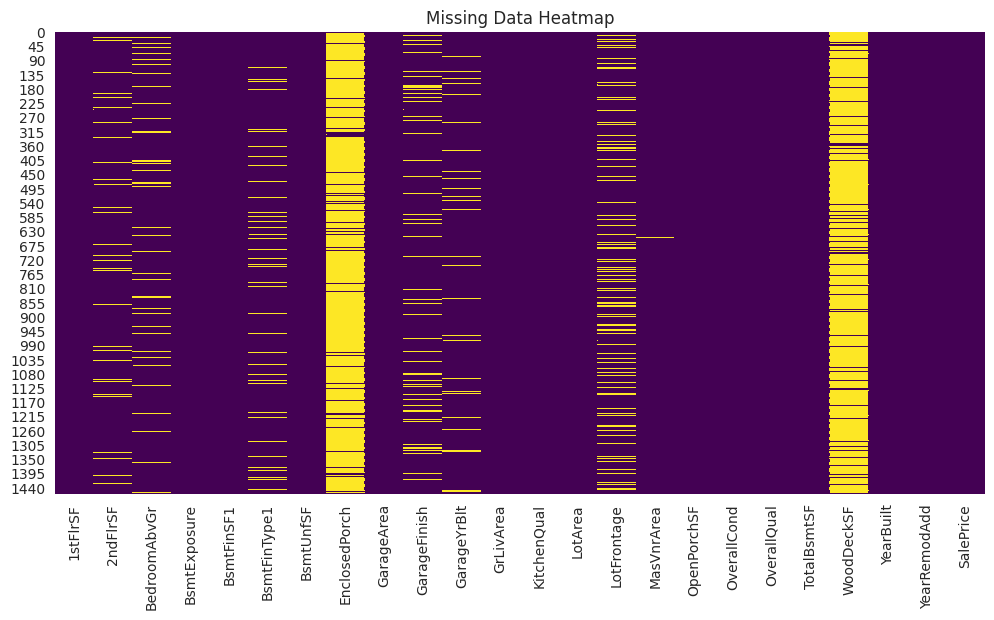

In [12]:
# Visualize missing data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(house_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


Target Variable Analysis
Distribution of Sale Prices

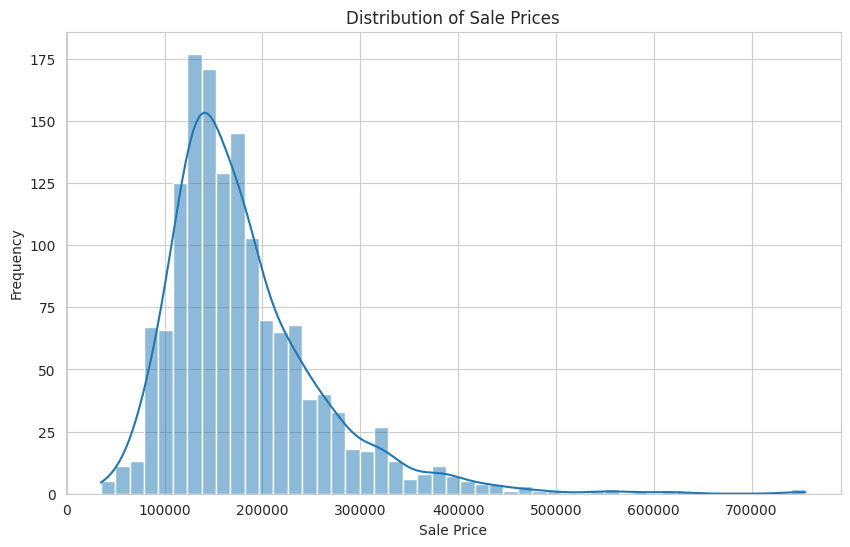

In [13]:
# Plot the distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(house_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


## Observation:

As the distribution is right-skewed. I am applying a log transformation to normalize.

# Log Transformation of SalePrice

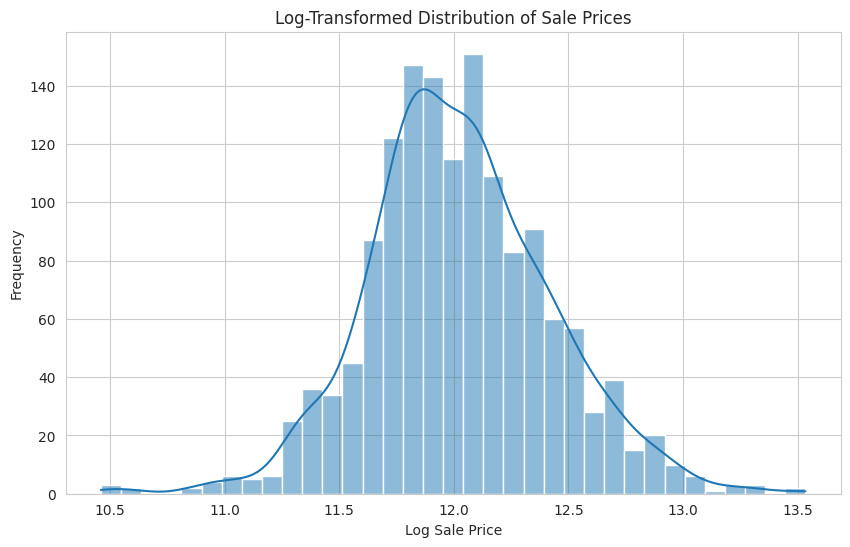

In [14]:
# Apply log transformation
house_data['SalePrice_Log'] = np.log1p(house_data['SalePrice'])

# Plot the transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(house_data['SalePrice_Log'], kde=True)
plt.title('Log-Transformed Distribution of Sale Prices')
plt.xlabel('Log Sale Price')
plt.ylabel('Frequency')
plt.show()


Log transformation helps in stabilizing variance and making the data more normal distribution-like, which benefits some algorithms.


# Correlation Analysis


In [15]:
# Compute correlation matrix
corr_matrix = house_data.corr()

# Focus on correlations with SalePrice
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
corr_with_saleprice


SalePrice        1.000000
SalePrice_Log    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
2ndFlrSF         0.322335
OpenPorchSF      0.315856
LotArea          0.263843
WoodDeckSF       0.252027
BsmtUnfSF        0.214479
BedroomAbvGr     0.161901
OverallCond     -0.077856
EnclosedPorch   -0.176458
Name: SalePrice, dtype: float64

# Top Correlated Features:

 OverallQual
 GrLivArea
 TotalBsmtSF
 1stFlrSF
 FullBath
 YearBuilt



# Heatmap of Top Correlated Features


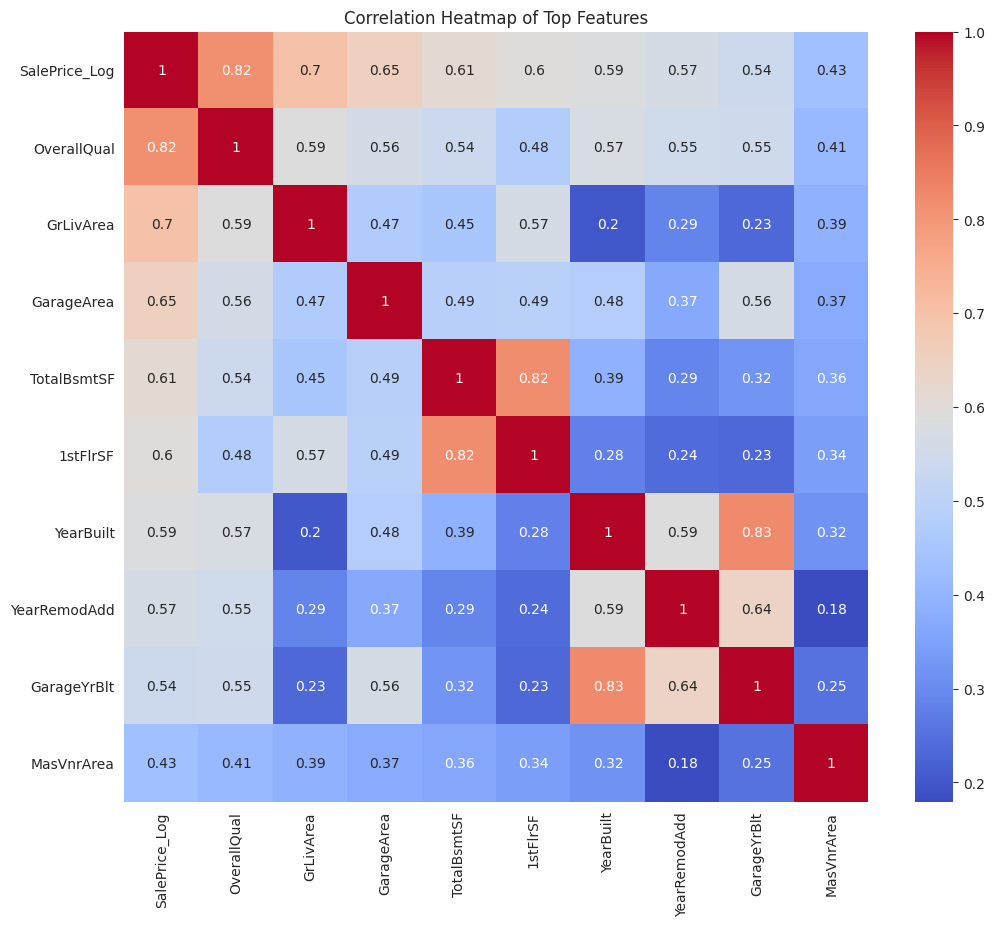

In [16]:
# Select top features
top_features = corr_with_saleprice.index[1:11]

# Correlation matrix of top features
plt.figure(figsize=(12, 10))
sns.heatmap(house_data[top_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features')
plt.show()


# Pairplot of Top Features

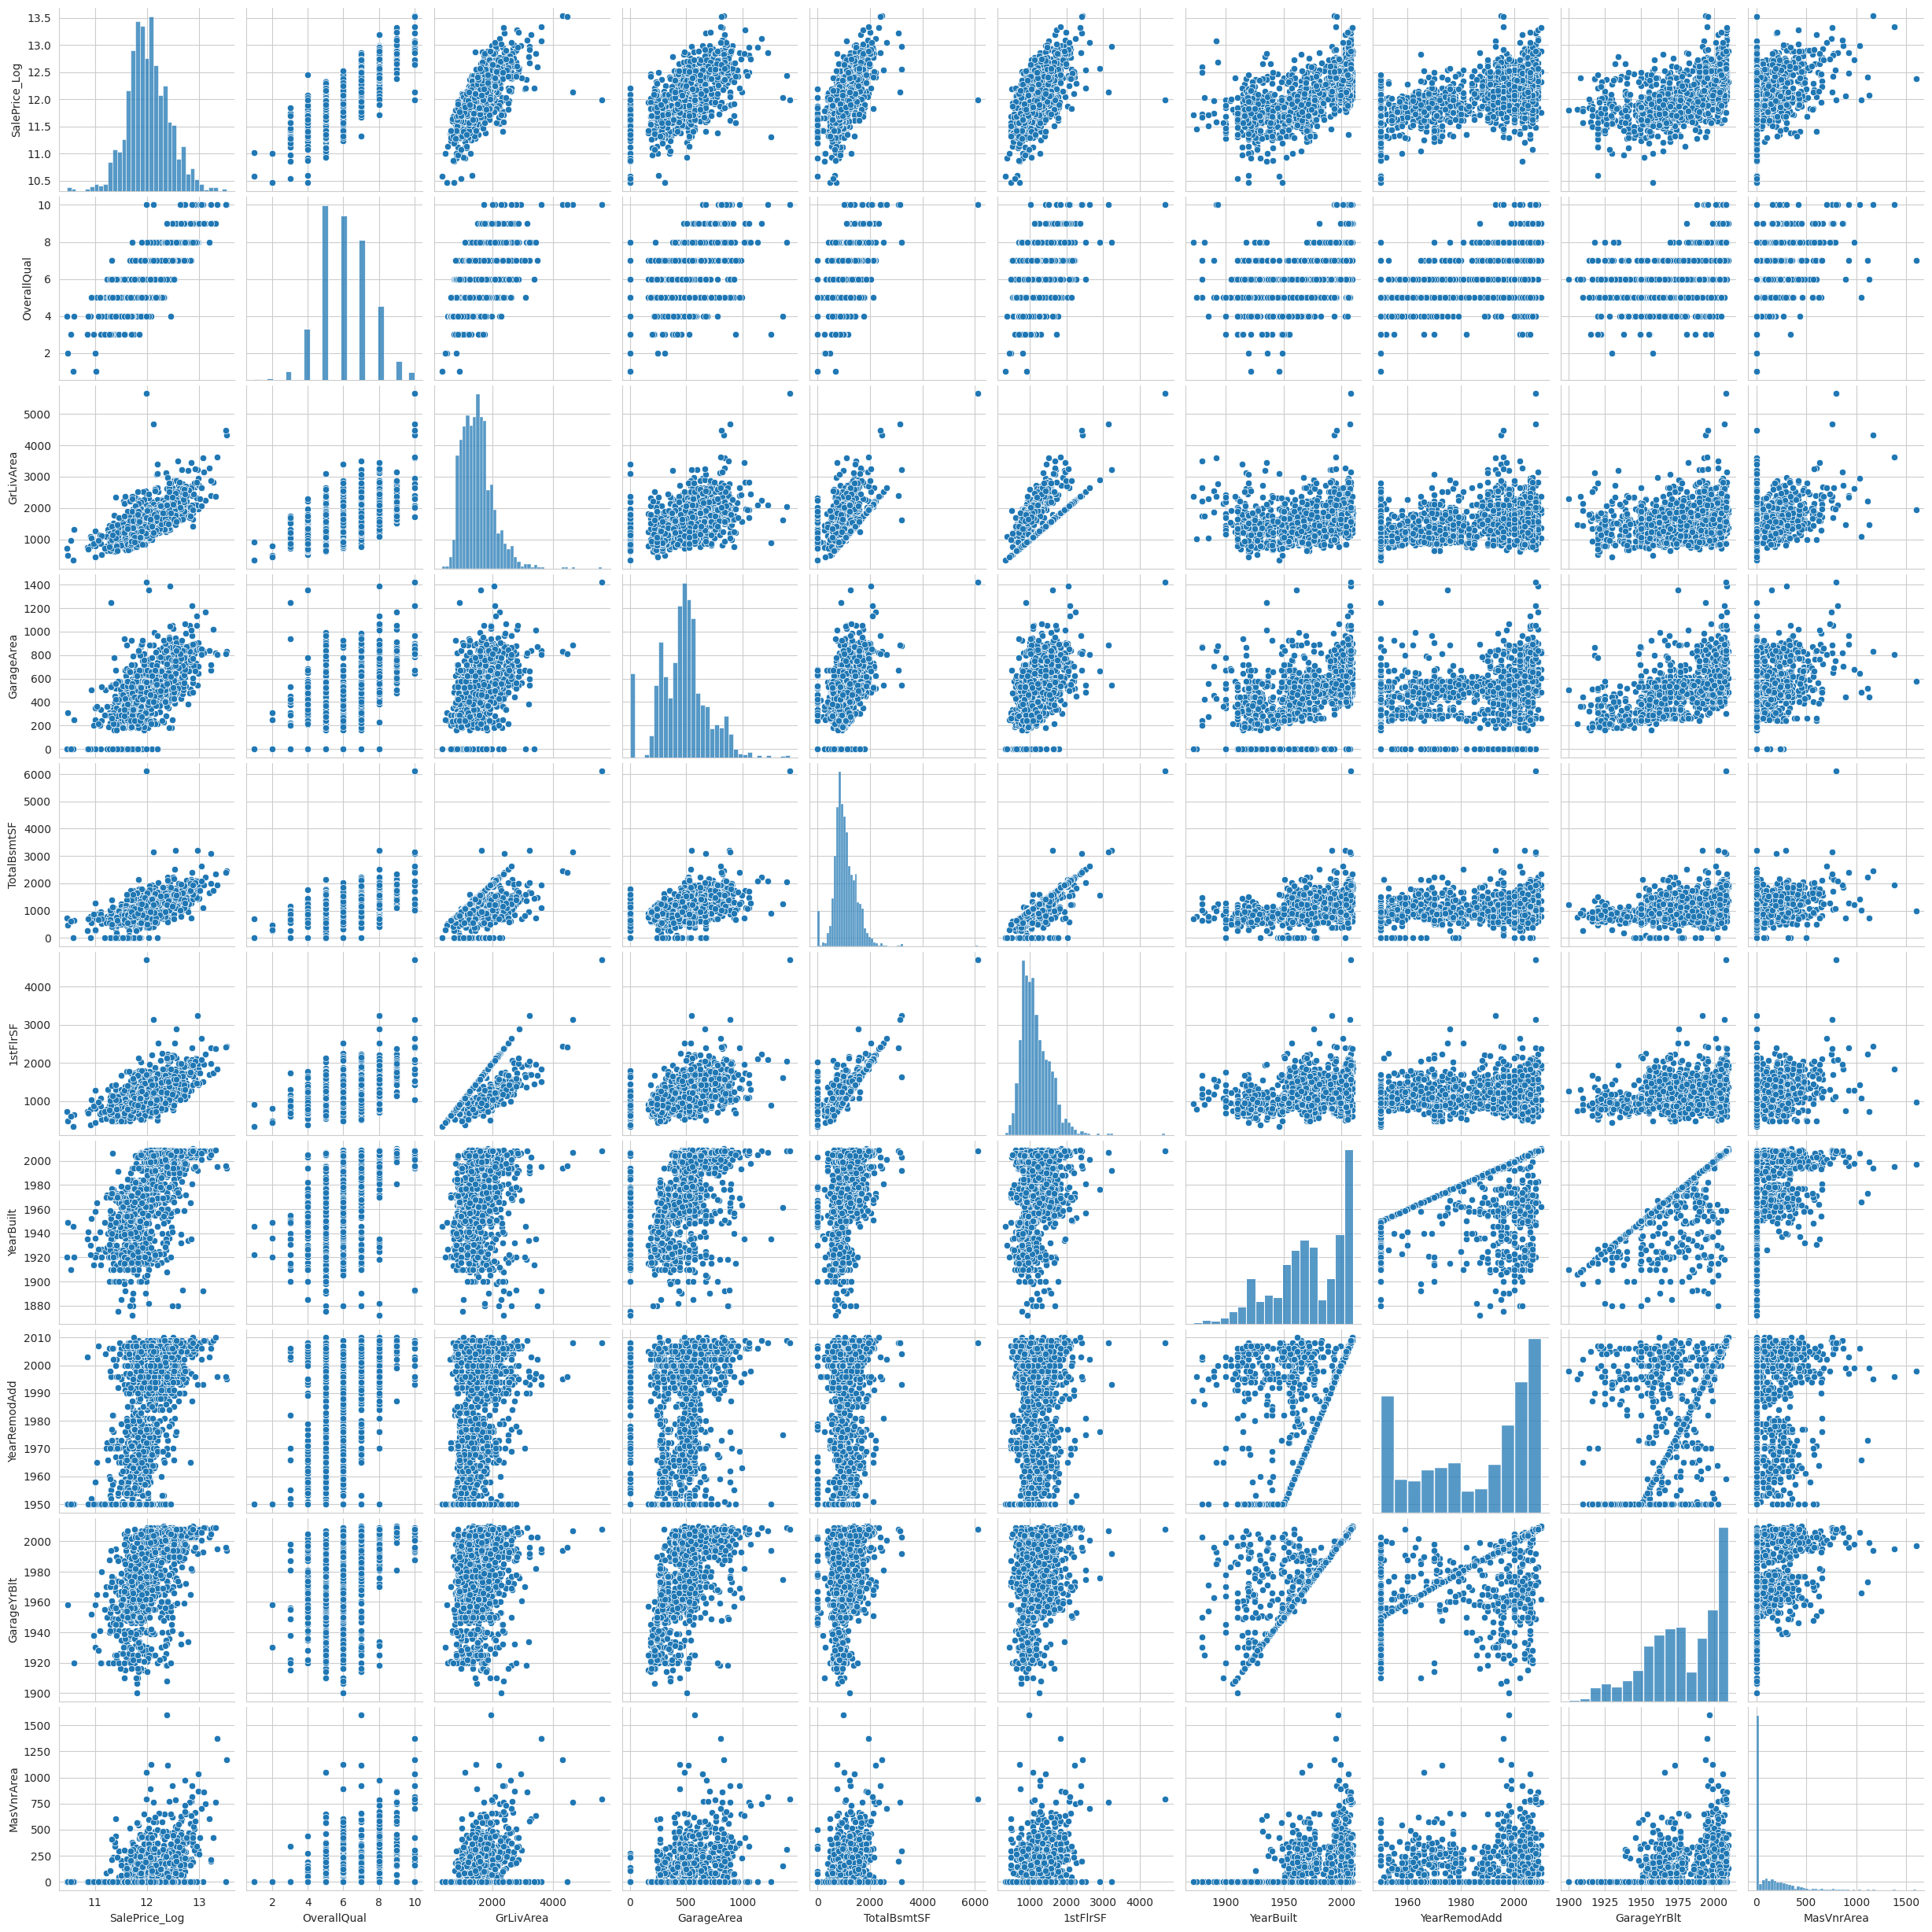

In [17]:
# Pairplot
sns.pairplot(house_data[top_features])
plt.show()


## Observation:

- Some linear patterns, some right-skewed distribution, mutiple outliers and some bad data


# Data Preprocessing

Data preprocessing ensures that the data is clean and suitable for modeling.

Handling Missing Values
Imputing Missing Values
LotFrontage: Missing values may be related to property type.

In [18]:
# Impute LotFrontage using median values per Neighborhood (if available)
# Since Neighborhood is not in the dataset, we can impute with the overall median
house_data['LotFrontage'].fillna(house_data['LotFrontage'].median(), inplace=True)


GarageYrBlt: Missing values likely correspond to houses without a garage.

In [19]:
# Replace missing GarageYrBlt with YearBuilt or 0
house_data['GarageYrBlt'].fillna(house_data['YearBuilt'], inplace=True)


Categorical Features with Missing Values: Replace with 'None' or the most frequent category.

In [20]:
# List of categorical features to fill missing values
categorical_features = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

for feature in categorical_features:
    house_data[feature].fillna('None', inplace=True)


# Encoding Categorical Variables

Convert categorical variables into numerical format.

Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Categorical columns to encode
categorical_cols = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

# Apply Label Encoding
for col in categorical_cols:
    house_data[col] = le.fit_transform(house_data[col])


# Handling Skewed Features

Applying log transformation to skewed numerical features, to reduce the skewness and improve the performance.

In [22]:
# Identify skewed numerical features
numeric_feats = house_data.dtypes[house_data.dtypes != "object"].index

skewed_feats = house_data[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_feats})

# Features with skewness greater than 0.75
skewed_features = skewness[abs(skewness) > 0.75].index

# Apply log transformation
for feat in skewed_features:
    house_data[feat] = np.log1p(house_data[feat])


NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
